**Figure**: It is a whole figure which may contain one or more than one axes (plots). You can think of a Figure as a canvas which contains plots.

**Axes**: It is what we generally think of as a plot. A Figure can contain many Axes. It contains two or three (in the case of 3D) Axis objects. Each Axes has a title, an x-label and a y-label.

**Axis**: They are the number line like objects and take care of generating the graph limits.

# Histograms, Binnings, and Density

A simple histogram can be a great first step in understanding a dataset.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

(array([  2.,   9.,  41., 116., 204., 291., 186., 103.,  41.,   7.]),
 array([-3.56326846, -2.89731106, -2.23135366, -1.56539626, -0.89943887,
        -0.23348147,  0.43247593,  1.09843333,  1.76439073,  2.43034812,
         3.09630552]),
 <a list of 10 Patch objects>)

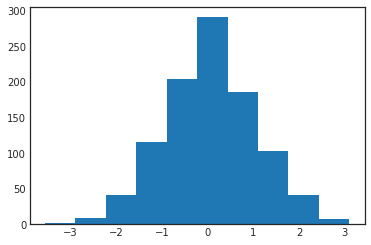

In [2]:
plt.hist(data)

The ``hist()`` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram:

(array([0.00750799, 0.        , 0.00750799, 0.        , 0.        ,
        0.        , 0.01501598, 0.00750799, 0.01501598, 0.03003195,
        0.04504793, 0.06757189, 0.05255591, 0.07507988, 0.06757189,
        0.14265177, 0.16517573, 0.21022366, 0.16517573, 0.18769969,
        0.24025561, 0.32284347, 0.32284347, 0.3078275 , 0.33785945,
        0.41293933, 0.37539939, 0.46549524, 0.39041536, 0.54057512,
        0.20271567, 0.33785945, 0.31533549, 0.26277957, 0.27779555,
        0.21773165, 0.21022366, 0.15015976, 0.12763579, 0.06757189,
        0.16517573, 0.05255591, 0.04504793, 0.02252396, 0.02252396,
        0.01501598, 0.01501598, 0.        , 0.00750799, 0.01501598]),
 array([-3.56326846, -3.43007698, -3.2968855 , -3.16369402, -3.03050254,
        -2.89731106, -2.76411958, -2.6309281 , -2.49773662, -2.36454514,
        -2.23135366, -2.09816218, -1.9649707 , -1.83177922, -1.69858774,
        -1.56539626, -1.43220478, -1.2990133 , -1.16582182, -1.03263035,
        -0.89943887, -0.76

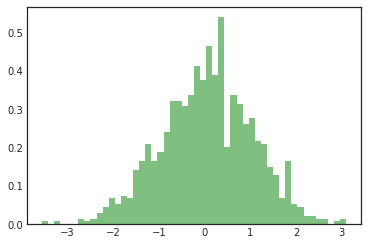

In [11]:
plt.hist(data, bins=50, density=True, alpha=0.5,
         histtype='stepfilled', color='green',
         edgecolor='none')

The ``plt.hist`` docstring has more information on other customization options available.
I find this combination of ``histtype='stepfilled'`` along with some transparency ``alpha`` to be very useful when comparing histograms of several distributions:

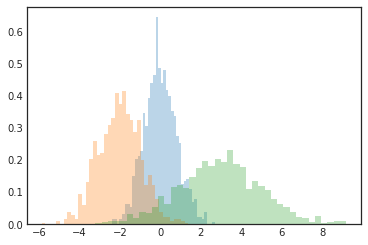

In [4]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)


If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the ``np.histogram()`` function is available:

In [5]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 11 157 495 289  48]


## Two-Dimensional Histograms and Binnings

Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins.
We'll take a brief look at several ways to do this here.
We'll start by defining some data—an ``x`` and ``y`` array drawn from a multivariate Gaussian (normal) distribution:

In [6]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d``: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's ``plt.hist2d`` function:

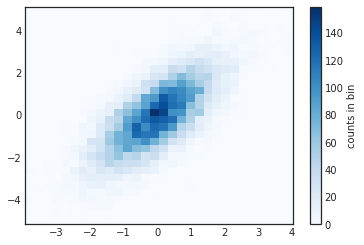

In [7]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Just as with ``plt.hist``, ``plt.hist2d`` has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the function docstring.
Further, just as ``plt.hist`` has a counterpart in ``np.histogram``, ``plt.hist2d`` has a counterpart in ``np.histogram2d``, which can be used as follows:

In [8]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

For the generalization of this histogram binning in dimensions higher than two, see the ``np.histogramdd`` function.

### ``plt.hexbin``: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the ``plt.hexbin`` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

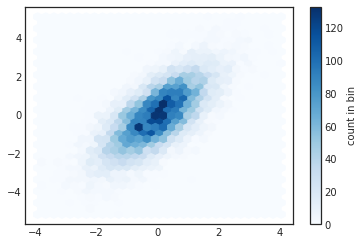

In [9]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

``plt.hexbin`` has a number of interesting options, including the ability to specify weights for each point, and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.).